In [20]:
import numpy as np
import tensorflow as tf
from khmernltk import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Add custom font
font_path = 'KhmerOSContent-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Check if the font is correctly loaded
if font_prop.get_name() in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
	plt.rcParams['font.family'] = font_prop.get_name()
else:
	print(f"Font '{font_prop.get_name()}' not found. Using default font.")


N = 5
H = 512

Font 'Khmer OS Content' not found. Using default font.


In [21]:
with open("data/temples_cleaned.txt") as f:
    text = f.read()
text

'ប្រាសាទអង្គរវត្តឬប្រាសាទអង្គរតូចមានទីតាំងស្ថិតនៅភាគខាងជើងនៃក្រុងសៀមរាបនៃខេត្តសៀមរាបប្រាសាទអង្គរវត្តជាប្រាសាទព្រហ្មញ្ញសាសនាធំបំផុតនិងជាវិមានសាសនាដ៏ធំបំផុតនៅក្នុងលោកប្រាសាទនេះត្រូវបានកសាងឡើងដោយព្រះបាទសូរ្យវរ្ម័នទី២ដែលជាស្នាដៃដ៏ធំអស្ចារ្យនិងមានឈ្មោះល្បីល្បាញរន្ទឺសុះសាយទៅគ្រប់ទិសទីលើពិភពលោកប្រាសាទនេះសាងសង់ឡើងនៅដើមសតវត្សទី១២ដែលស្ថិតនៅក្នុងរាជធានីយសោធរបុរៈប្រាសាទអង្គរវត្តជាប្រាសាទកសាងឡើងដើម្បីឧទ្ទិសដល់ព្រះវិស្ណុប្រាសាទនេះជាប្រាសាទដែលនៅគង់វង្សល្អបំផុតនៅក្នុងតំបន់អង្គរប្រាសាទអង្គរវត្តប្រើកម្លាំងពលកម្មប្រម៉ាណជាងមុឺននាក់និងដំរីជាងពាន់ក្បាលនិងប្រើប្រាស់ថ្មសរុបប្រមាណជាងលានតោននៅក្នុងប្រាសាទមានចម្លាក់អប្សរាយ៉ាងស្អាតចំណែកឯទីធ្លាខាងក្រៅមានដើមត្នោតរួមទាំងទេសភាពដ៏ស្រស់បំព្រងហើយនៅជុំវិញប្រាសាទប្រាសាទអង្គរវត្តត្រូវបានរចនាដើម្បីតំណាងភ្នំព្រះសុមេរុដែលជាទីលំនៅរបស់អាទិទេពនិងទេវតាក្នុងទេវកថាហិណ្ឌូដែលមានកសិ្សណឬគូទឹកព័ទ្ធជុំវិញប្រហែលជា១៦គីឡូម៉ែត្រចំណែកកសិ្សណពិតប្រាកដរបស់ប្រាសាទមានបណ្តោយប្រវែង១៥០០ម៉ែត្រទទឹង១៣០០ម៉ែត្រលើ២០០ម៉ែត្រផ្លូវធំដើរចូលពីទិសខាងលិចទៅដល់ប្រាសាទកណ្តាលមានប្រវែង២៥០ម៉ែត្រឯកំពូលកណ្ដាលខ្ពស់ធំជាងគេបំ

In [22]:
with open("data/vocab.txt") as f:
    vocab = f.read().splitlines()
len(vocab), vocab

(172,
 ['ចូល',
  'ស្ថាបត្យកម្ម',
  'មួយ',
  'ពី',
  'ភ្នំ',
  'ខាងលិច',
  'ខ្មែរ',
  'ចុង',
  'ពួក',
  'ជាមួយ',
  'ច្រក',
  'អ្នក',
  'ប្រហែល',
  'ទេវតា',
  'ធំ',
  'ក្នុង',
  'គ្នា',
  'ម៉ែត្រ',
  'នឹង',
  'លើ',
  'ហើយ',
  'ខ្ពស់',
  'ចំពោះ',
  'ព័ទ្ធ',
  'ដូចជា',
  'ទាំងអស់',
  'ធ្វើ',
  'ដើម',
  'ឆ្នាំ',
  'នៃ',
  'ប្រមាណ',
  'ក្បាច់',
  'ផ្សេង',
  'របស់',
  'មិន',
  'ឈ្មោះ',
  'ចេញ',
  'ស្រុក',
  'បុរាណ',
  'ដំបូង',
  'អាច',
  'អង្គរ',
  'តំណាង',
  'ខេត្ត',
  'ប្រវែង',
  'កំពែង',
  'នោះ',
  'ប្រទេស',
  'តែ',
  'សាសនា',
  'នូវ',
  'ប្រាសាទ',
  'ដោយ',
  'បី',
  'ទៅ',
  'ខាងក្រៅ',
  'ថ្ម',
  'ខាងជើង',
  'នៅក្នុង',
  'មក',
  'សំណង់',
  'សតវត្សរ៍',
  'ទី',
  'បុរៈ',
  'ស្ថិត',
  'ថ្ងៃ',
  'ទឹក',
  'ប៉ម',
  'ពាក្យ',
  'ដើម្បី',
  'ដ៏',
  'ឃើញ',
  'គឺជា',
  'នៅ',
  'ដី',
  'ថា',
  'អោយ',
  'តាម',
  'ចំនួន',
  'ផ្លូវ',
  'គេ',
  'ន័យ',
  'កំពុង',
  'រចនាបថ',
  'វិញ',
  'ផងដែរ',
  'ប្រើ',
  'ជាប់',
  'ដំបូល',
  'នគរ',
  'ជុំវិញ',
  'កន្លែង',
  'ទេសចរណ៍',
  'រាង',
  'មាន',
  'និង',
  'ហៅ',
 

In [23]:
tokens = word_tokenize(text)
tokens

['ប្រាសាទ',
 'អង្គរវត្ត',
 'ឬ',
 'ប្រាសាទ',
 'អង្គរ',
 'តូច',
 'មាន',
 'ទីតាំង',
 'ស្ថិត',
 'នៅ',
 'ភាគ',
 'ខាងជើង',
 'នៃ',
 'ក្រុង',
 'សៀមរាប',
 'នៃ',
 'ខេត្ត',
 'សៀមរាប',
 'ប្រាសាទ',
 'អង្គរវត្ត',
 'ជា',
 'ប្រាសាទ',
 'ព្រហ្មញ្ញ',
 'សាសនា',
 'ធំ',
 'បំផុត',
 'និង',
 'ជា',
 'វិមាន',
 'សាសនា',
 'ដ៏',
 'ធំ',
 'បំផុត',
 'នៅក្នុង',
 'លោក',
 'ប្រាសាទ',
 'នេះ',
 'ត្រូវបាន',
 'កសាងឡើង',
 'ដោយ',
 'ព្រះបាទ',
 'សូរ្យ',
 'វរ្ម័ន',
 'ទី២',
 'ដែល',
 'ជា',
 'ស្នាដៃ',
 'ដ៏',
 'ធំ',
 'អស្ចារ្យ',
 'និង',
 'មាន',
 'ឈ្មោះ',
 'ល្បីល្បាញ',
 'រន្ទឺ',
 'សុះ',
 'សាយ',
 'ទៅ',
 'គ្រប់',
 'ទិសទី',
 'លើ',
 'ពិភពលោក',
 'ប្រាសាទ',
 'នេះ',
 'សាងសង់',
 'ឡើង',
 'នៅ',
 'ដើម',
 'សតវត្ស',
 'ទី',
 '១២',
 'ដែល',
 'ស្ថិត',
 'នៅក្នុង',
 'រាជធានីយ',
 'សោធរ',
 'បុរៈ',
 'ប្រាសាទ',
 'អង្គរវត្ត',
 'ជា',
 'ប្រាសាទ',
 'កសាងឡើង',
 'ដើម្បី',
 'ឧទ្ទិស',
 'ដល់',
 'ព្រះវិស្ណុ',
 'ប្រាសាទ',
 'នេះ',
 'ជា',
 'ប្រាសាទ',
 'ដែល',
 'នៅ',
 'គង់វង្ស',
 'ល្អ',
 'បំផុត',
 'នៅក្នុង',
 'តំបន់',
 'អង្គរ',
 'ប្រាសាទ',
 'អង្គរវត្ត',
 'ប្រើ',
 'កម្លាំង'

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(vocab), output_dim=50, input_length=N))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(H, activation='sigmoid'))
model.add(tf.keras.layers.Dense(len(vocab), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 50)             8600      
                                                                 
 flatten_1 (Flatten)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               128512    
                                                                 
 dense_3 (Dense)             (None, 172)               88236     
                                                                 
Total params: 225348 (880.27 KB)
Trainable params: 225348 (880.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Create training data
X = []
y = []
for i in range(len(tokens) - N):
    X.append(tokens[i:i+N])
    y.append(tokens[i+N])

X = np.array(X)
y = np.array(y)
X.shape, y.shape

((9165, 5), (9165,))

In [26]:
X, y

(array([['ប្រាសាទ', 'អង្គរវត្ត', 'ឬ', 'ប្រាសាទ', 'អង្គរ'],
        ['អង្គរវត្ត', 'ឬ', 'ប្រាសាទ', 'អង្គរ', 'តូច'],
        ['ឬ', 'ប្រាសាទ', 'អង្គរ', 'តូច', 'មាន'],
        ...,
        ['នៅតែ', 'បន្ត', 'រហូតមក', 'ទល់', 'សព្វ'],
        ['បន្ត', 'រហូតមក', 'ទល់', 'សព្វ', 'ថៃ្ង'],
        ['រហូតមក', 'ទល់', 'សព្វ', 'ថៃ្ង', 'នេះ']], dtype='<U20'),
 array(['តូច', 'មាន', 'ទីតាំង', ..., 'ថៃ្ង', 'នេះ', '៤'], dtype='<U20'))

In [27]:
# Convert words to indices
X = np.array([[vocab.index(w) if w in vocab else 0 for w in x] for x in X])
y = np.array([vocab.index(w) if w in vocab else 0 for w in y])
X, y

(array([[ 51, 125, 161,  51,  41],
        [125, 161,  51,  41, 159],
        [161,  51,  41, 159,  94],
        ...,
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 122]]),
 array([159,  94,   0, ...,   0, 122,   0]))

In [28]:
# Remove rows with unknown words
mask = np.all(X != 0, axis=1)
X = X[mask]
y = y[mask]
X.shape, y.shape, X[:5], y[:5]

((633, 5),
 (633,),
 array([[ 51, 125, 161,  51,  41],
        [125, 161,  51,  41, 159],
        [161,  51,  41, 159,  94],
        [ 64,  73, 140,  57,  29],
        [ 73, 140,  57,  29, 104]]),
 array([159,  94,   0, 104, 116]))

In [29]:
index_to_word = np.load("data/index_to_word.npy", allow_pickle=True).item()
index_to_word

{0: 'ចូល',
 1: 'ស្ថាបត្យកម្ម',
 2: 'មួយ',
 3: 'ពី',
 4: 'ភ្នំ',
 5: 'ខាងលិច',
 6: 'ខ្មែរ',
 7: 'ចុង',
 8: 'ពួក',
 9: 'ជាមួយ',
 10: 'ច្រក',
 11: 'អ្នក',
 12: 'ប្រហែល',
 13: 'ទេវតា',
 14: 'ធំ',
 15: 'ក្នុង',
 16: 'គ្នា',
 17: 'ម៉ែត្រ',
 18: 'នឹង',
 19: 'លើ',
 20: 'ហើយ',
 21: 'ខ្ពស់',
 22: 'ចំពោះ',
 23: 'ព័ទ្ធ',
 24: 'ដូចជា',
 25: 'ទាំងអស់',
 26: 'ធ្វើ',
 27: 'ដើម',
 28: 'ឆ្នាំ',
 29: 'នៃ',
 30: 'ប្រមាណ',
 31: 'ក្បាច់',
 32: 'ផ្សេង',
 33: 'របស់',
 34: 'មិន',
 35: 'ឈ្មោះ',
 36: 'ចេញ',
 37: 'ស្រុក',
 38: 'បុរាណ',
 39: 'ដំបូង',
 40: 'អាច',
 41: 'អង្គរ',
 42: 'តំណាង',
 43: 'ខេត្ត',
 44: 'ប្រវែង',
 45: 'កំពែង',
 46: 'នោះ',
 47: 'ប្រទេស',
 48: 'តែ',
 49: 'សាសនា',
 50: 'នូវ',
 51: 'ប្រាសាទ',
 52: 'ដោយ',
 53: 'បី',
 54: 'ទៅ',
 55: 'ខាងក្រៅ',
 56: 'ថ្ម',
 57: 'ខាងជើង',
 58: 'នៅក្នុង',
 59: 'មក',
 60: 'សំណង់',
 61: 'សតវត្សរ៍',
 62: 'ទី',
 63: 'បុរៈ',
 64: 'ស្ថិត',
 65: 'ថ្ងៃ',
 66: 'ទឹក',
 67: 'ប៉ម',
 68: 'ពាក្យ',
 69: 'ដើម្បី',
 70: 'ដ៏',
 71: 'ឃើញ',
 72: 'គឺជា',
 73: 'នៅ',
 74: 'ដី',
 75: 'ថា',
 

In [30]:
X[0], y[0], [index_to_word[i] for i in X[0]], index_to_word[y[0]]

(array([ 51, 125, 161,  51,  41]),
 159,
 ['ប្រាសាទ', 'អង្គរវត្ត', 'ឬ', 'ប្រាសាទ', 'អង្គរ'],
 'តូច')

In [31]:
model.fit(X, y, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 5ms/step - loss: 4.2028 - accuracy: 0.2480
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 3.5056 - accuracy: 0.3855
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 3.3999 - accuracy: 0.3855
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 3.3501 - accuracy: 0.3855
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 3.3031 - accuracy: 0.3855
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 3.2218 - accuracy: 0.3855
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 3.1494 - accuracy: 0.3855
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 3.0881 - accuracy: 0.3902
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 2.9889 - accuracy: 0.3965
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 2.9073 - accuracy: 0.4186
Epoch 11/

In [32]:
def predict_next_word(model, sentence):
    _tokens = word_tokenize(sentence)
    if len(_tokens) != N:
        raise ValueError(f"Expected {N} words, got {len(_tokens)}")
    x = np.array([[vocab.index(w) if w in vocab else 0 for w in _tokens]])
    y = model.predict(x)
    return index_to_word[np.argmax(y)]

In [33]:
word = "អង្គរវត្តឬប្រាសាទអង្គរតូច"
predict_next_word(model, word)

1/1 [==============================] - 0s 70ms/step


'មាន'

In [34]:
# Save model
model.save("models/IV.keras")

In [35]:
# Save the new embeddings
embeddings = model.layers[0].get_weights()[0]
np.save("data/scratch_embeddings.npy", embeddings)
embeddings.shape, embeddings

((172, 50),
 array([[ 0.02940292, -0.0063962 ,  0.03168276, ...,  0.02841082,
         -0.03380442, -0.00442383],
        [ 0.4286734 , -0.05431544, -0.01897039, ..., -0.06498124,
          0.22173125, -0.15292779],
        [ 0.32828236,  0.42026162, -0.03982709, ...,  0.360563  ,
          0.45193106,  0.2336455 ],
        ...,
        [-0.00831852,  0.421248  , -0.22223757, ..., -0.09839202,
          0.00568985,  0.28810462],
        [-0.29091963, -0.36434114, -0.02682173, ...,  0.16439757,
          0.22757703,  0.26182294],
        [-0.19769141, -0.6498917 , -0.32083204, ..., -0.23673414,
          0.12702   ,  0.07712203]], dtype=float32))

In [36]:
# Fit PCA on the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [37]:
# Map the reduced embeddings to the words
word_to_embedding_reduced = {word: reduced_embeddings[i] for i, word in index_to_word.items()}
word_to_embedding_reduced

{'ចូល': array([ 0.01284201, -0.01986615], dtype=float32),
 'ស្ថាបត្យកម្ម': array([-0.04668414, -0.62310517], dtype=float32),
 'មួយ': array([-0.07290053, -1.1349808 ], dtype=float32),
 'ពី': array([-0.08343792, -0.11964996], dtype=float32),
 'ភ្នំ': array([0.10009577, 0.89341456], dtype=float32),
 'ខាងលិច': array([ 0.14987268, -1.1200304 ], dtype=float32),
 'ខ្មែរ': array([ 0.32727927, -0.31058553], dtype=float32),
 'ចុង': array([0.06607483, 0.00785913], dtype=float32),
 'ពួក': array([-1.1647704 , -0.43281877], dtype=float32),
 'ជាមួយ': array([ 1.3033556 , -0.08790576], dtype=float32),
 'ច្រក': array([-1.2566313 ,  0.40827152], dtype=float32),
 'អ្នក': array([-0.29017526,  0.15722933], dtype=float32),
 'ប្រហែល': array([-0.8559278,  0.1678541], dtype=float32),
 'ទេវតា': array([ 0.23597297, -0.3007328 ], dtype=float32),
 'ធំ': array([ 0.50880295, -0.3790727 ], dtype=float32),
 'ក្នុង': array([-0.03339816, -0.54353815], dtype=float32),
 'គ្នា': array([ 0.40119538, -0.83785224], dtype=float

/opt/miniconda3/envs/dl/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/dl/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


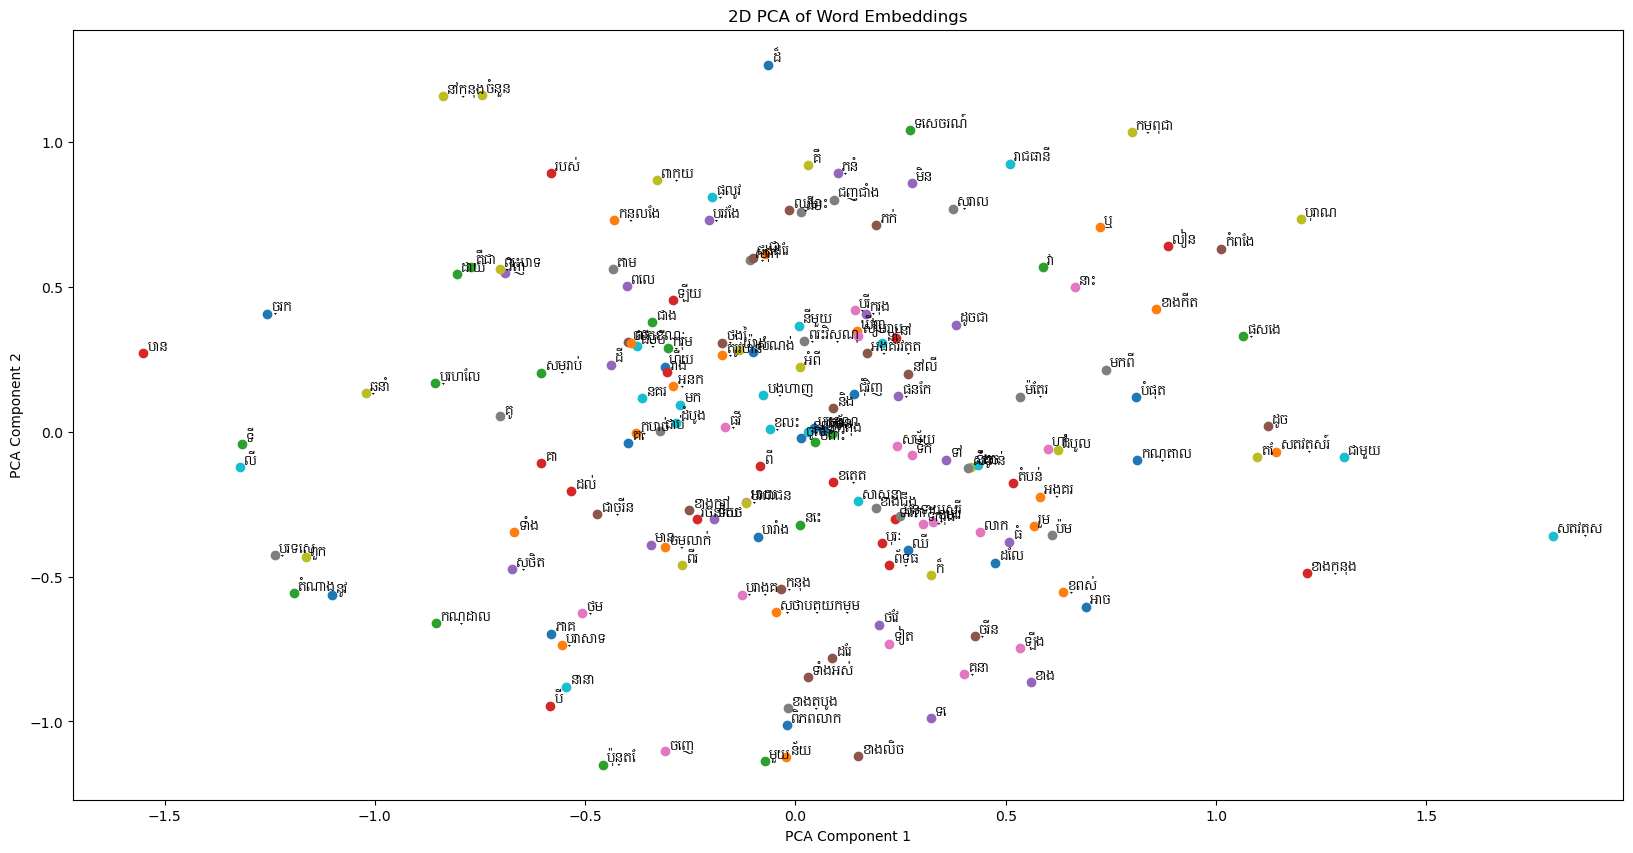

In [38]:
# Plot the reduced embeddings
plt.figure(figsize=(20, 10))
for word, coord in word_to_embedding_reduced.items():
    plt.scatter(coord[0], coord[1])
    plt.text(coord[0] + 0.01, coord[1] + 0.01, word, fontsize=9, fontproperties=font_prop)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Word Embeddings')
plt.show()